# Validação de Modelos de Clusterização 

## Infraestrutura

- O ambiente virtual utilizado foi o Anaconda

Python utilizado:
<br>
<img src="imagem/python.png" align="left">

Pacotes do ambiente:

In [133]:
# Importação de bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import sklearn.cluster as cluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import euclidean

from DBCV import DBCV

In [120]:
# Carregamento do dataset
df = pd.read_csv("wine-clustering.csv")

## Escolha da Base de Dados

#### 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

Conteúdo

As variáveis são:

- Alcohol: teor alcoólico
- Malic_Acid: concentração de ácido málico
- Ash: restos de matéria inorgânica após evaporação
- Ash_Alcanity: alcalinidade dos restos de matéria inorgânica após evaporação
- Magnesium: concentração de magnésio
- Total_Phenols: concentração total de fenóis
- Flavanoids: concentração de flavonóides
- Nonflavanoid_Phenols: concentração de fenóis não-flavonóides
- Proanthocyanins: concentração de um tipo específico de fenol encontrado na uva
- Color_Intensity: intensidade da cor do vinho
- Hue: tonalidade do vinho
- OD280: concentração de uma proteína conhecida como OD280
- Proline: concentração da substância prolina

#### 2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

##### Motivação

 Tratar esses dados poderia entender mais sobre as características químicas dos vinhos e como elas afetam suas classificações, como consequência disso podemos usar essas informações para produzir vinhos com melhores classificações, qualidade e com as melhores características para os consumidores


##### Objetivo

 Criar um modelo que preveja a classificação de um vinho com base em suas características químicas. Esse modelo será criado utilizando a técnica K-means para dividir os vinhos em grupos com base em suas características químicas e ver se esses grupos têm alguma relação com as classificações dos vinhos.

### Análise Exploratória

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  

#### 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização

<Figure size 1000x1000 with 0 Axes>

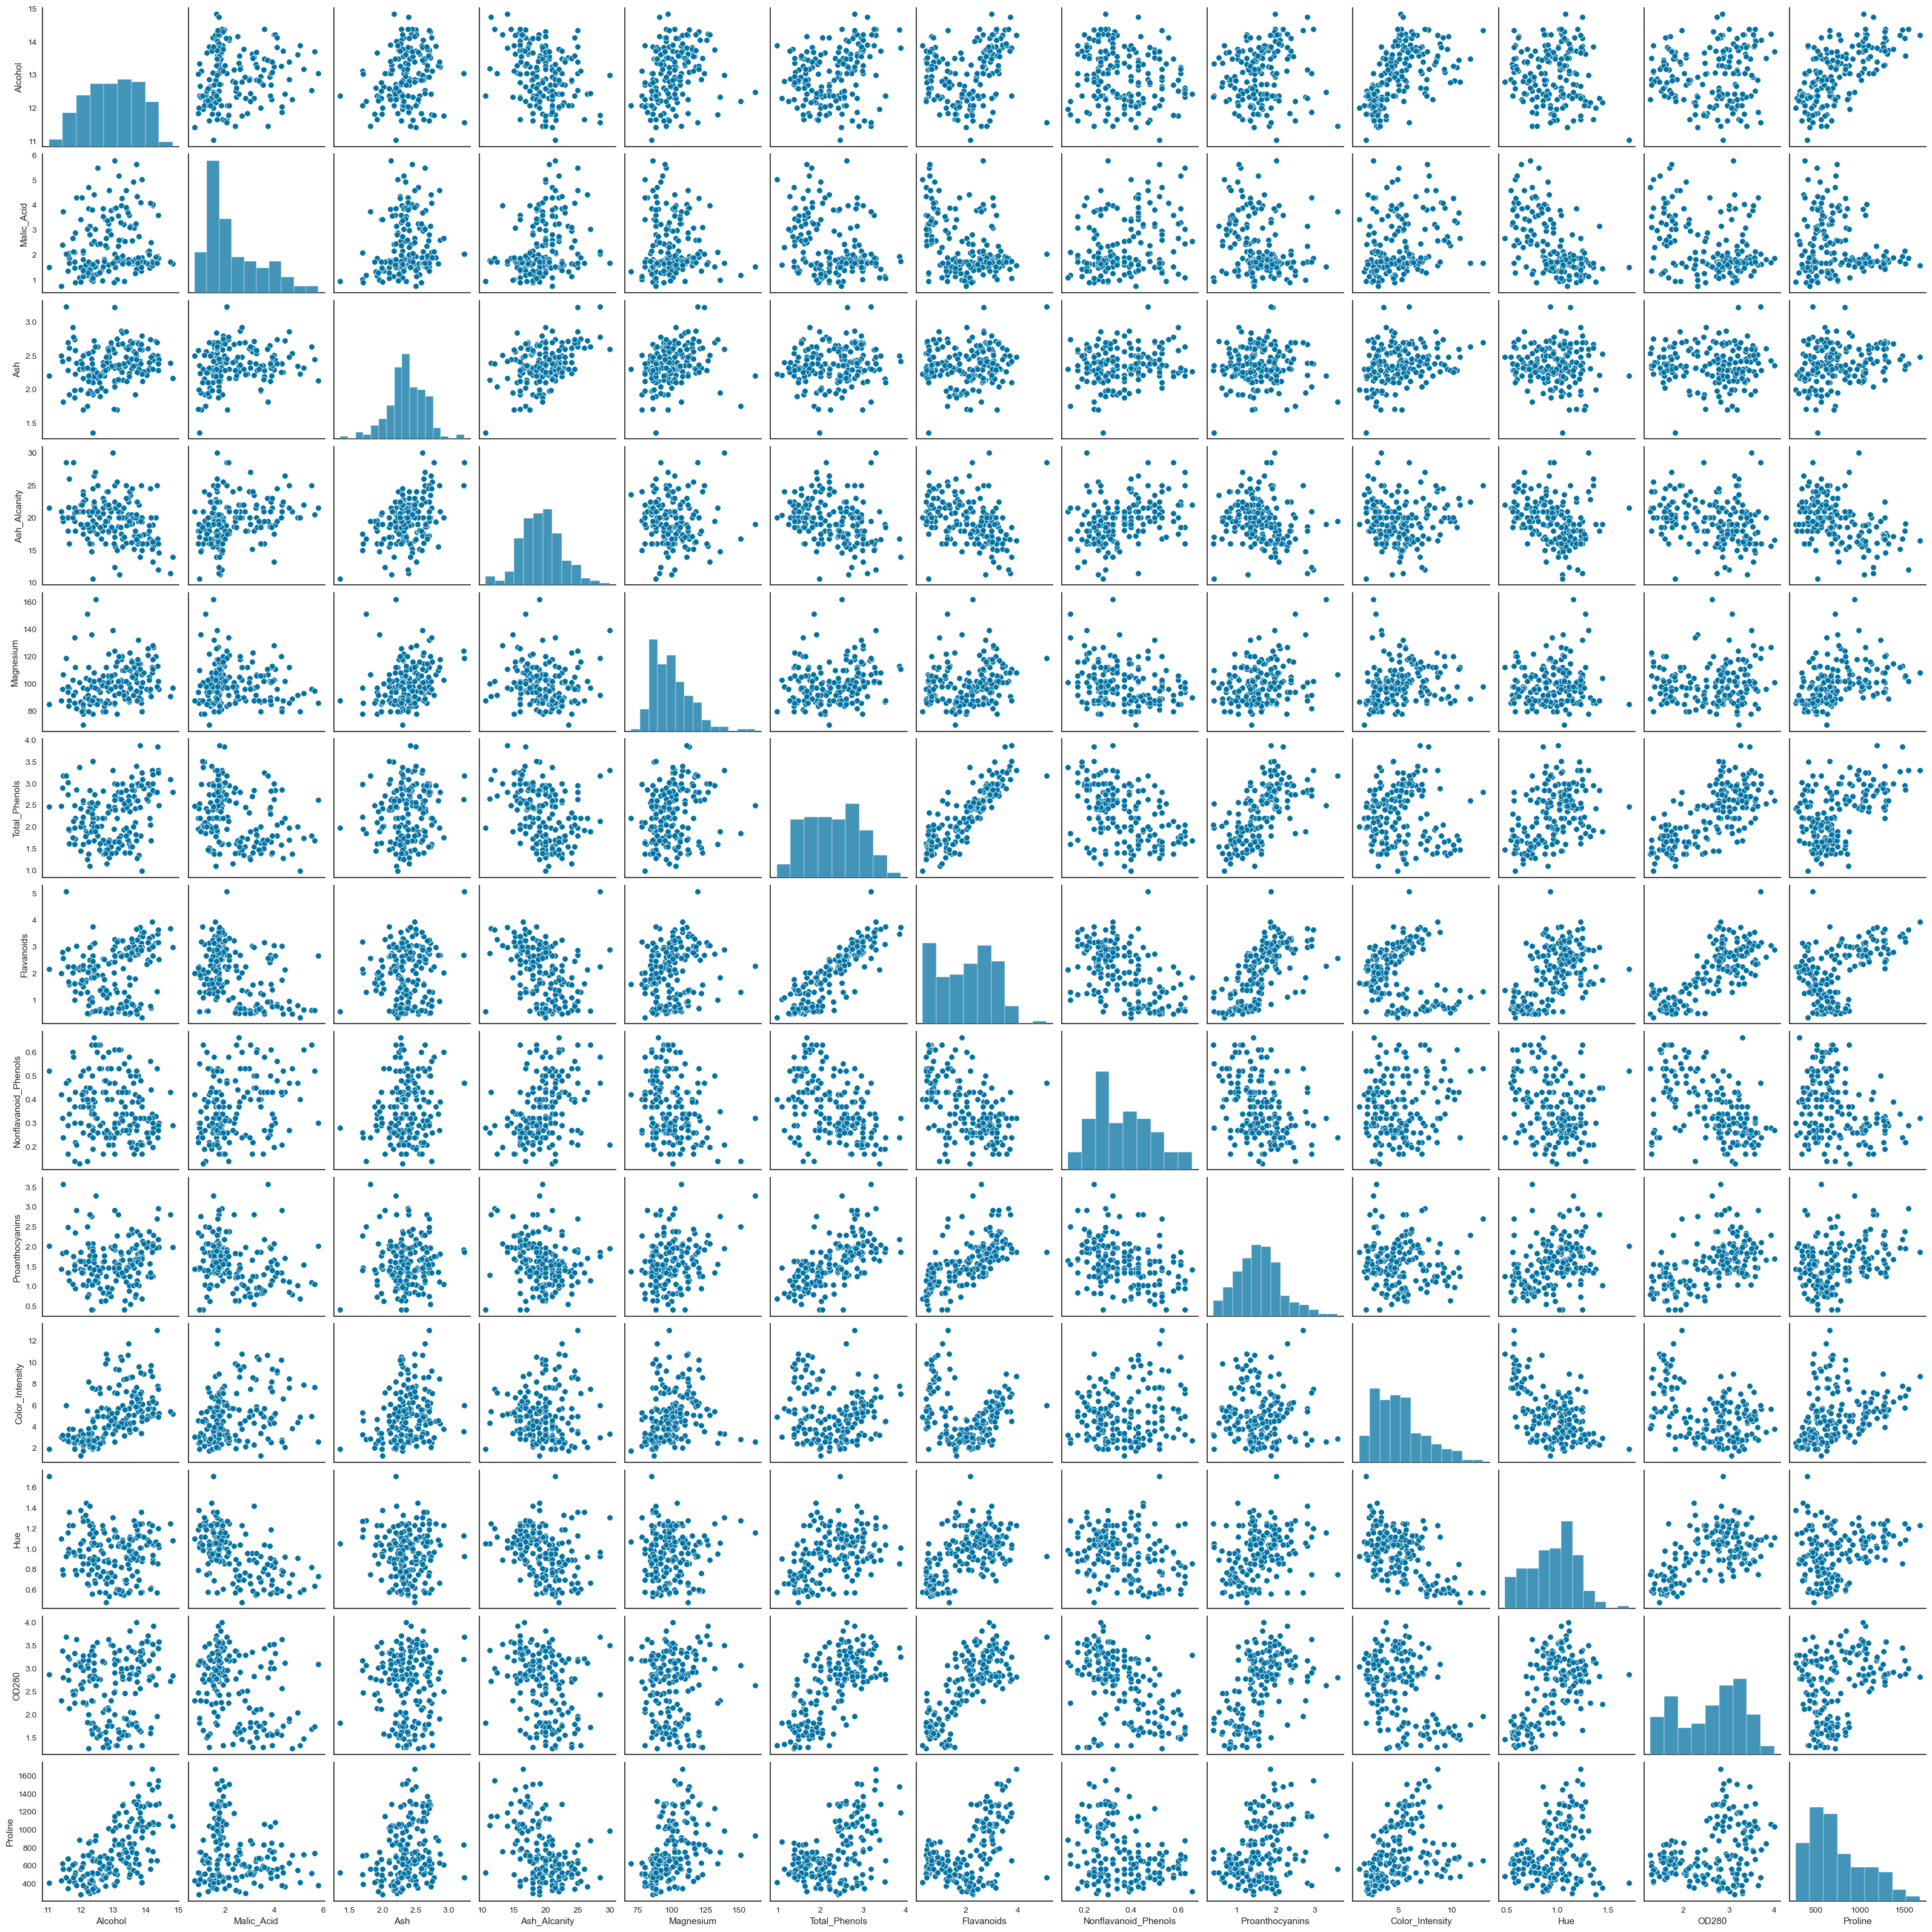

In [5]:
# Pairplot
plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             df,
             diag_kind='hist',
             corner=False
            )

plt.show()

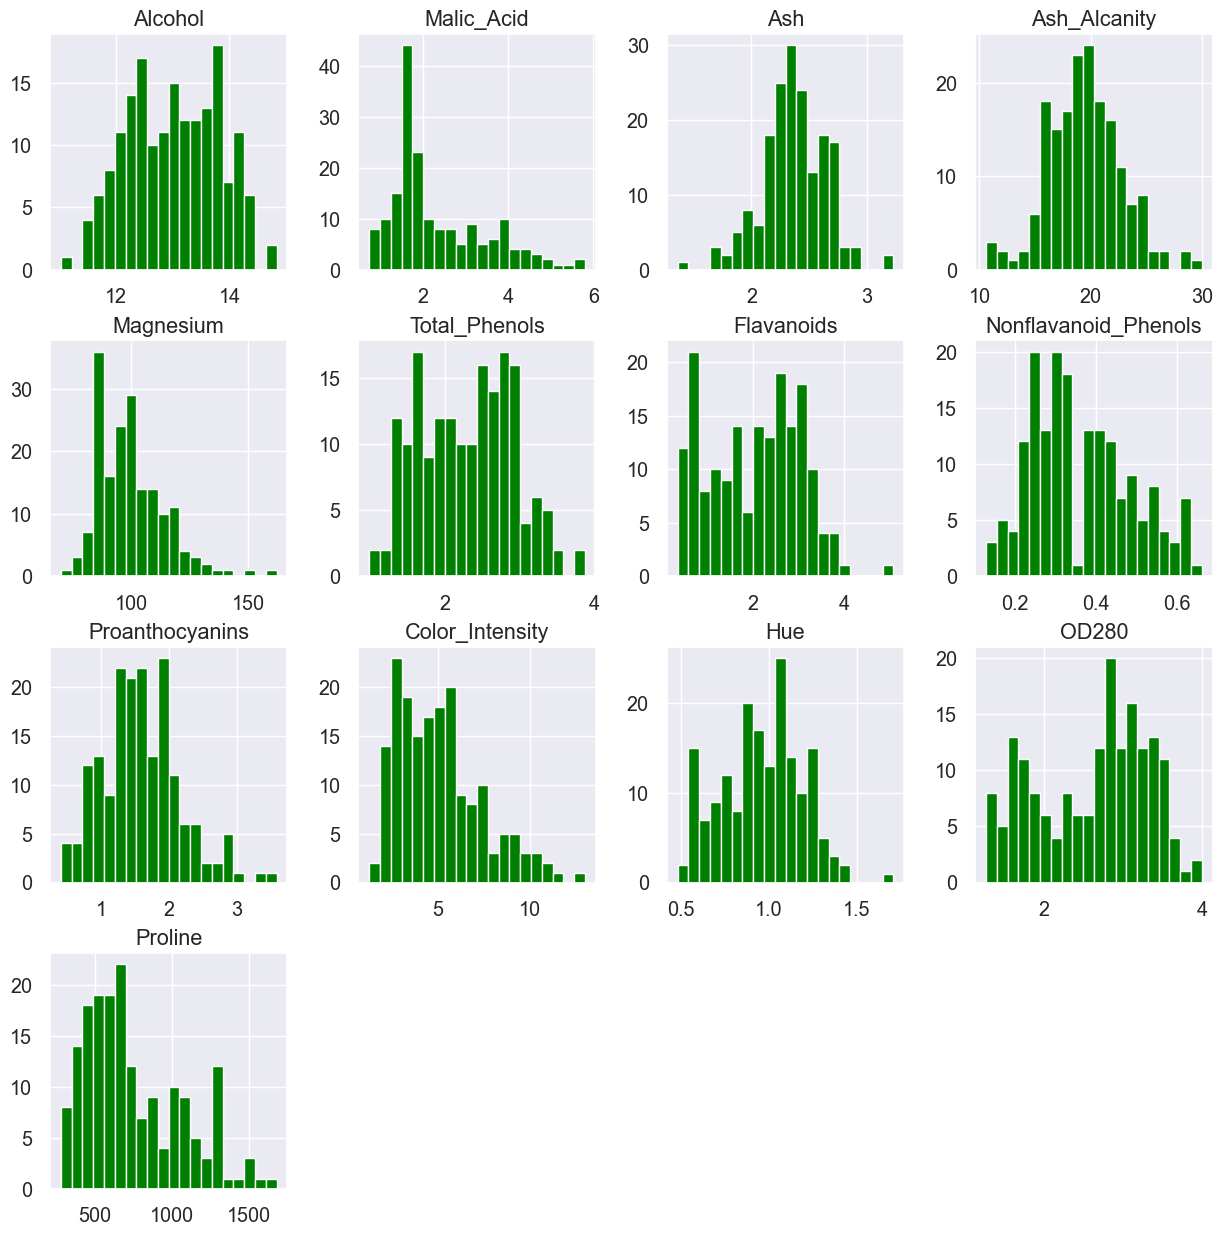

In [6]:
sns.set(style='darkgrid',font_scale=1.3, rc={'figure.figsize':(15,15)})
ax=df.hist(bins=20,color='green')

Traçando o histograma de cada variável numérica com objetivo de visualizar a distribuição dos dados para cada feature. 

Este gráfico pode trazer análises rápidos como:

- Verifique o tipo de distribuição de cada recurso
- Verifique a simetria dos dados
- Verifique a frequência dos recursos
- Identificar outliers

Podemos observar que muitas dessas distribuições fogem da normalidade. Por isso, para que o modelo tenha melhor desempenho, é necessária a padronização da escala das variáveis para que seus valores fiquem mais próximos a média e se aproximem a uma distribuição normal.

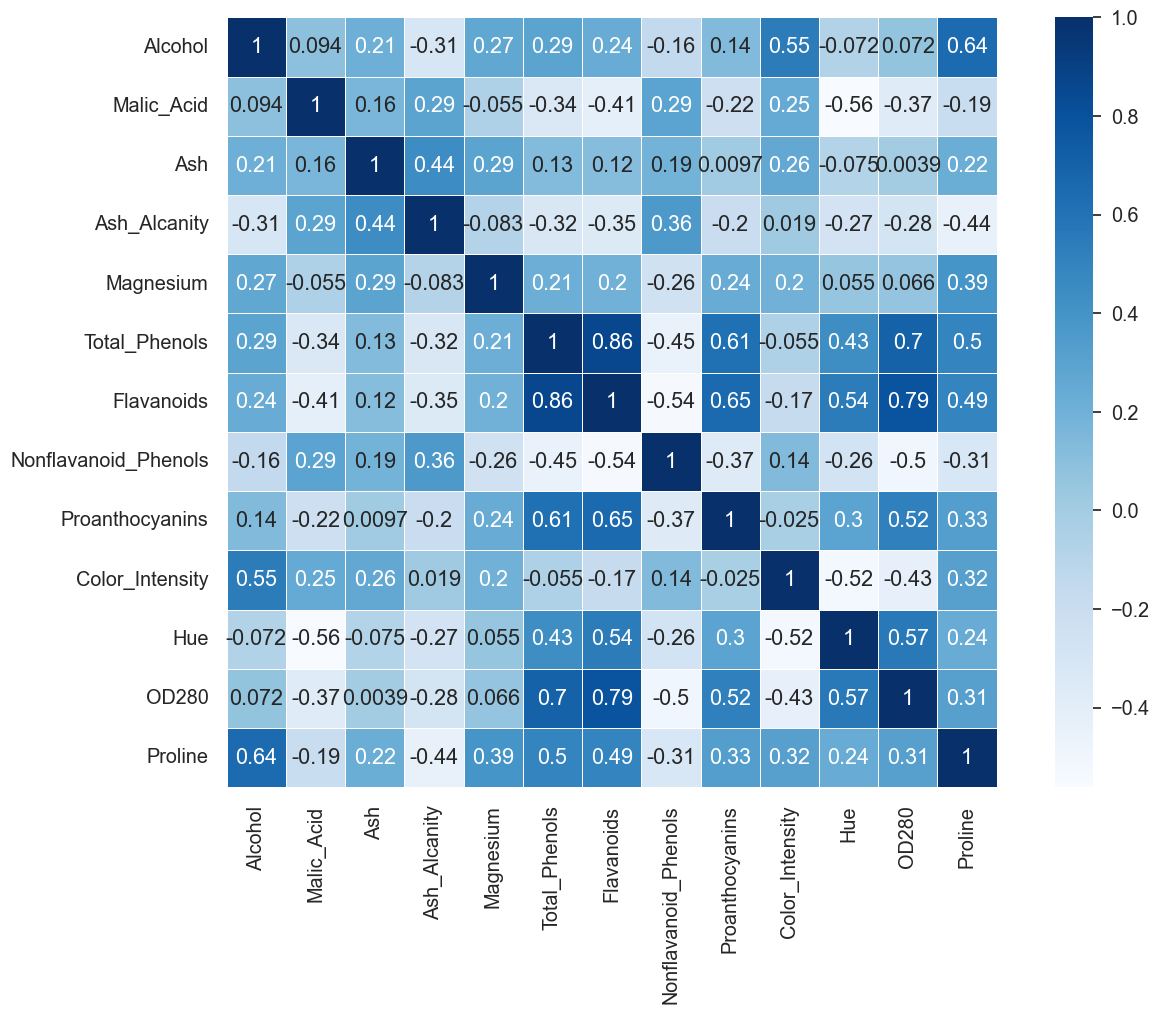

In [7]:
# Correlação
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, square=True, linewidths=.5, annot=True, cmap="Blues");

#### 3.1. Análise dos Resultados:

##### Gráfico Pairplot

Podemos observar que muitas dessas distribuições fogem da normalidade e fica claro a presença de outliers por visualizar varios pontos espalhados. Por isso, para que o modelo tenha melhor desempenho, é necessária a padronização da escala das variáveis para que seus valores fiquem mais próximos a média e se aproximem a uma distribuição normal.

##### Gráfico Correlação 

A correlação alta entre Total_Phenols x Flavonoids (0.86) faz todo sentido, uma vez que os flavonóides também são compostos que fazem parte da classe dos fenóis. Assim sendo, muito provavelmente as duas variáveis explicam a mesma coisa.

OD280 x Total_Phenols (0,70) e OD280 x Flavonoids (0,79). As relações podem indicar que essas variáveis explicam aspectos parecidos do vinho ou o mesmo aspecto.

#### 3.2. O que deve ser feito com os dados antes da etapa de clusterização?



- Verificar se os dados estão completos e limpos: é importante verificar se os dados não contêm valores faltantes ou incorretos, pois isso pode afetar negativamente o resultado da clusterização.

- Normalizar ou padronizar as variáveis: se as variáveis tiverem escala diferente, isso pode afetar o resultado da clusterização. Portanto, é importante normalizar ou padronizar as variáveis para que elas estejam na mesma escala.

- Escolher o número de clusters: antes de realizar a clusterização, é importante decidir qual o número de clusters a ser utilizado

#### 4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

In [8]:
#Verifica se tem dados nulos
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
#Verifica se tem dados duplicados
df.duplicated().sum()

0

In [10]:
# Normalização dos dados
normalized_df = (df-df.mean())/df.std()
normalized_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


##### Transformação de variáveis: em alguns casos, pode ser necessário aplicar transformações em uma ou mais variáveis para torná-las mais adequadas para a análise

In [85]:
# Instanciando a função 
df_wine_standard = StandardScaler().fit_transform(df)

wine_df_power = PowerTransformer(standardize=False).fit_transform(df_wine_standard)
# Novo dataset, agora padronizado
wine_df = pd.DataFrame(wine_df_power, columns=df.columns)
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.015199,-0.291833,0.023389,-0.036331,-0.177769,-0.017102,0.007803,-0.128710,-0.087717,-0.198211,0.008995,0.116531,-0.220454
std,1.002558,0.898256,1.001332,1.000137,0.938580,1.002305,1.002873,0.982599,0.987446,0.943597,1.002849,0.990640,0.944720
min,-2.360019,-2.326026,-3.446954,-2.902866,-3.046715,-2.175264,-1.675193,-2.352143,-2.458394,-2.307181,-2.059750,-1.556798,-2.127490
25%,-0.777799,-0.850722,-0.562738,-0.710116,-0.991234,-0.900244,-0.821690,-0.827554,-0.637383,-0.966008,-0.761556,-0.846275,-0.969269
50%,0.061076,-0.502802,-0.023802,0.001518,-0.126279,0.095748,0.106267,-0.181536,-0.063404,-0.166574,0.033146,0.246406,-0.250968
75%,0.847963,0.525745,0.711992,0.586323,0.453060,0.796708,0.855270,0.555772,0.588594,0.436214,0.718463,0.875251,0.624318
max,2.327775,1.516365,3.351710,2.880294,2.526479,2.450308,3.119832,1.853907,2.763271,2.050612,3.377744,2.421421,1.775682


## Clusterização

#### 1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:

- K-Médias
- DBScan

#### 1.1 Mostre o gráfico e justifique o número de clusters escolhidos. 

#### K-means

In [77]:
def plot_cluster_points(df, labels, ax=None, hue="cluster", legend="auto"):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax, legend=legend)

#### 1.1. Descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos

Processo de mensuração do índice de silhueta:
    
O índice de silhueta varia de -1 a 1, onde valores próximos de -1 indicam que o ponto de dados é muito melhor atribuído ao outro cluster, enquanto valores próximos de 1 indicam que o ponto de dados é muito melhor atribuído ao seu próprio cluster. Valores próximos de 0 indicam que o ponto de dados não está muito claramente atribuído a um cluster em particular.

Para calcular o índice de silhueta de cada ponto de dados, siga estes passos:

- Calcule a distância entre cada ponto de dados e todos os outros pontos de dados do mesmo cluster. A média dessas distâncias é chamada de "coesão" do cluster.

- Calcule a distância entre cada ponto de dados e todos os pontos de dados do cluster mais próximo. A média dessas distâncias é chamada de "separação" do cluster.

- Calcule o índice de silhueta para cada ponto de dados usando a seguinte fórmula:

índice de silhueta = (separação do cluster - coesão do cluster) / máximo(separação do cluster, coesão do cluster)

- Calcule a média dos índices de silhueta para todos os pontos de dados para obter o índice de silhueta médio para o conjunto de dados.
    

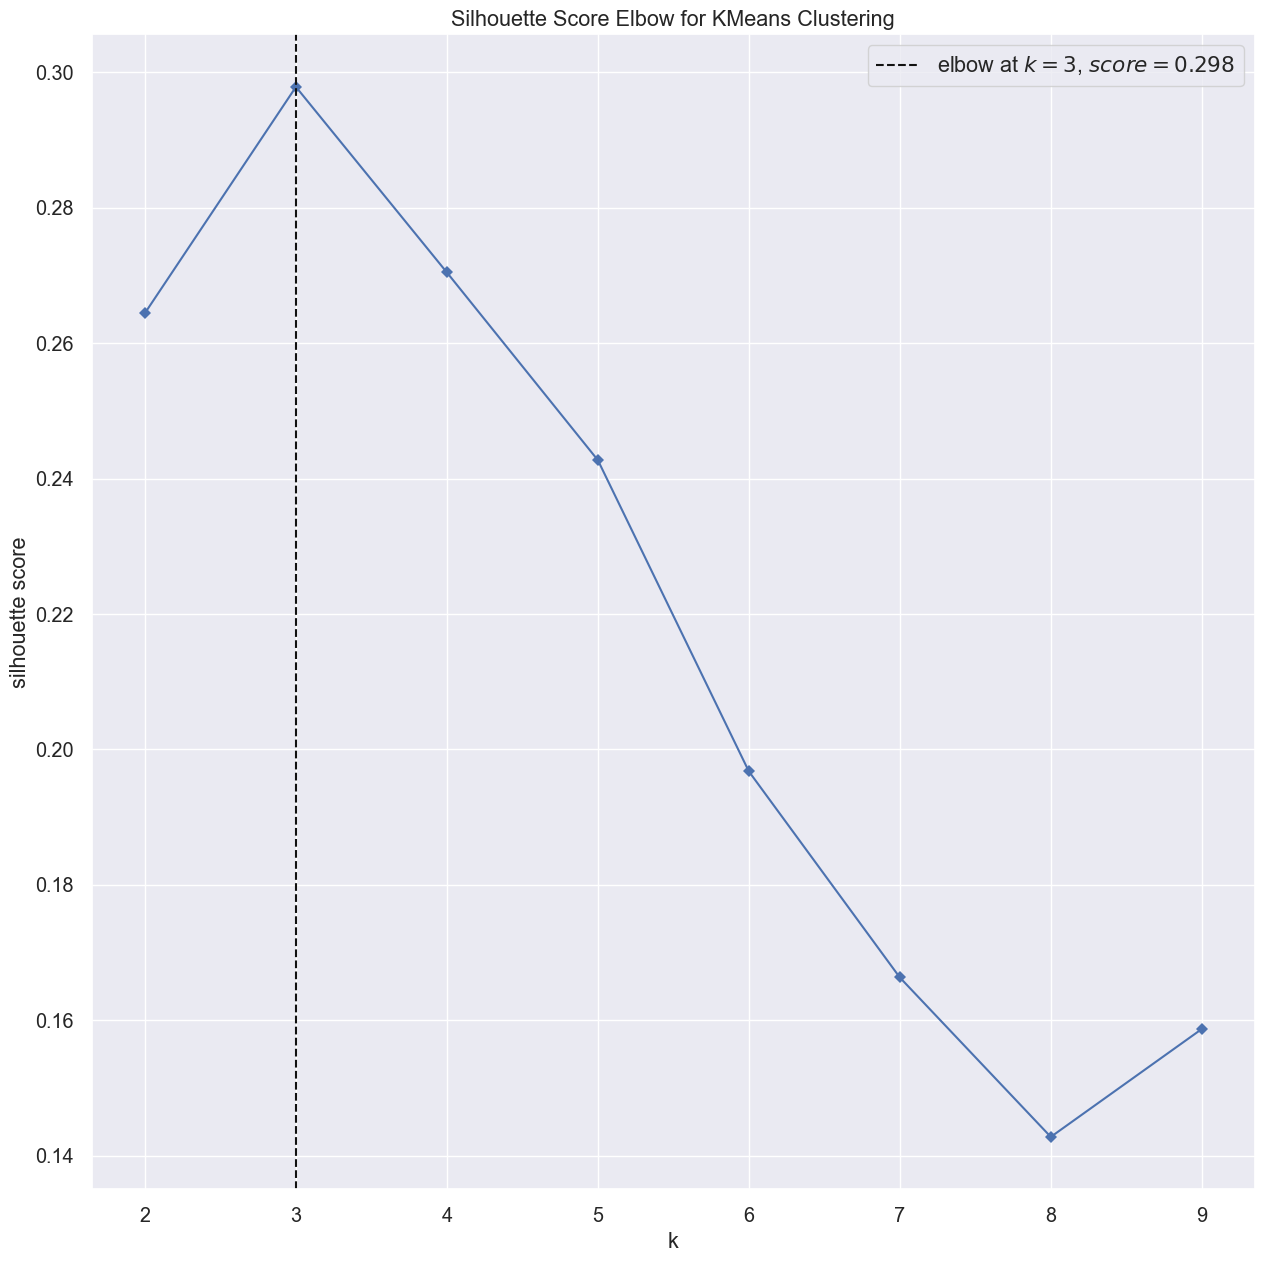

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [78]:
km = KMeans()
visualizer = KElbowVisualizer(
    km, k=(2,10), metric='silhouette', timings=False
)

visualizer.fit(X)        
visualizer.show()       

<b>Número de clusters escolhidos:</b>  O valor de K=3 é o mais adequado pois é ponto mais alto da silhueta

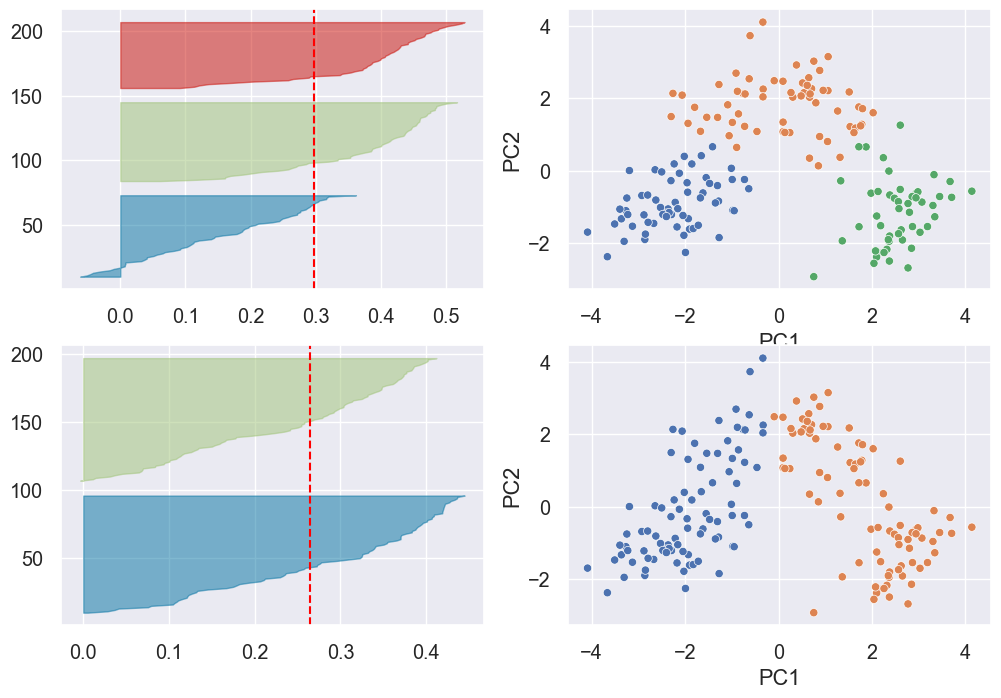

In [151]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

km_3 = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(km_3, ax=axs[0, 0], colors='yellowbrick')
visualizer.fit(wine_df)

plot_cluster_points(wine_df, km_3.labels_, 
                    hue=list(map(lambda x: sns.color_palette().as_hex()[x], km_3.labels_)), legend=False, ax=axs[0, 1])

km_4 = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(km_4, ax=axs[1, 0], colors='yellowbrick')
visualizer.fit(wine_df)

plot_cluster_points(wine_df, km_4.labels_, 
                    hue=list(map(lambda x: sns.color_palette().as_hex()[x], km_4.labels_)), legend=False, ax=axs[1, 1])

In [17]:
pd.Series(kmeans_labels).value_counts()

2    63
1    62
0    53
dtype: int64

#### DBScan

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

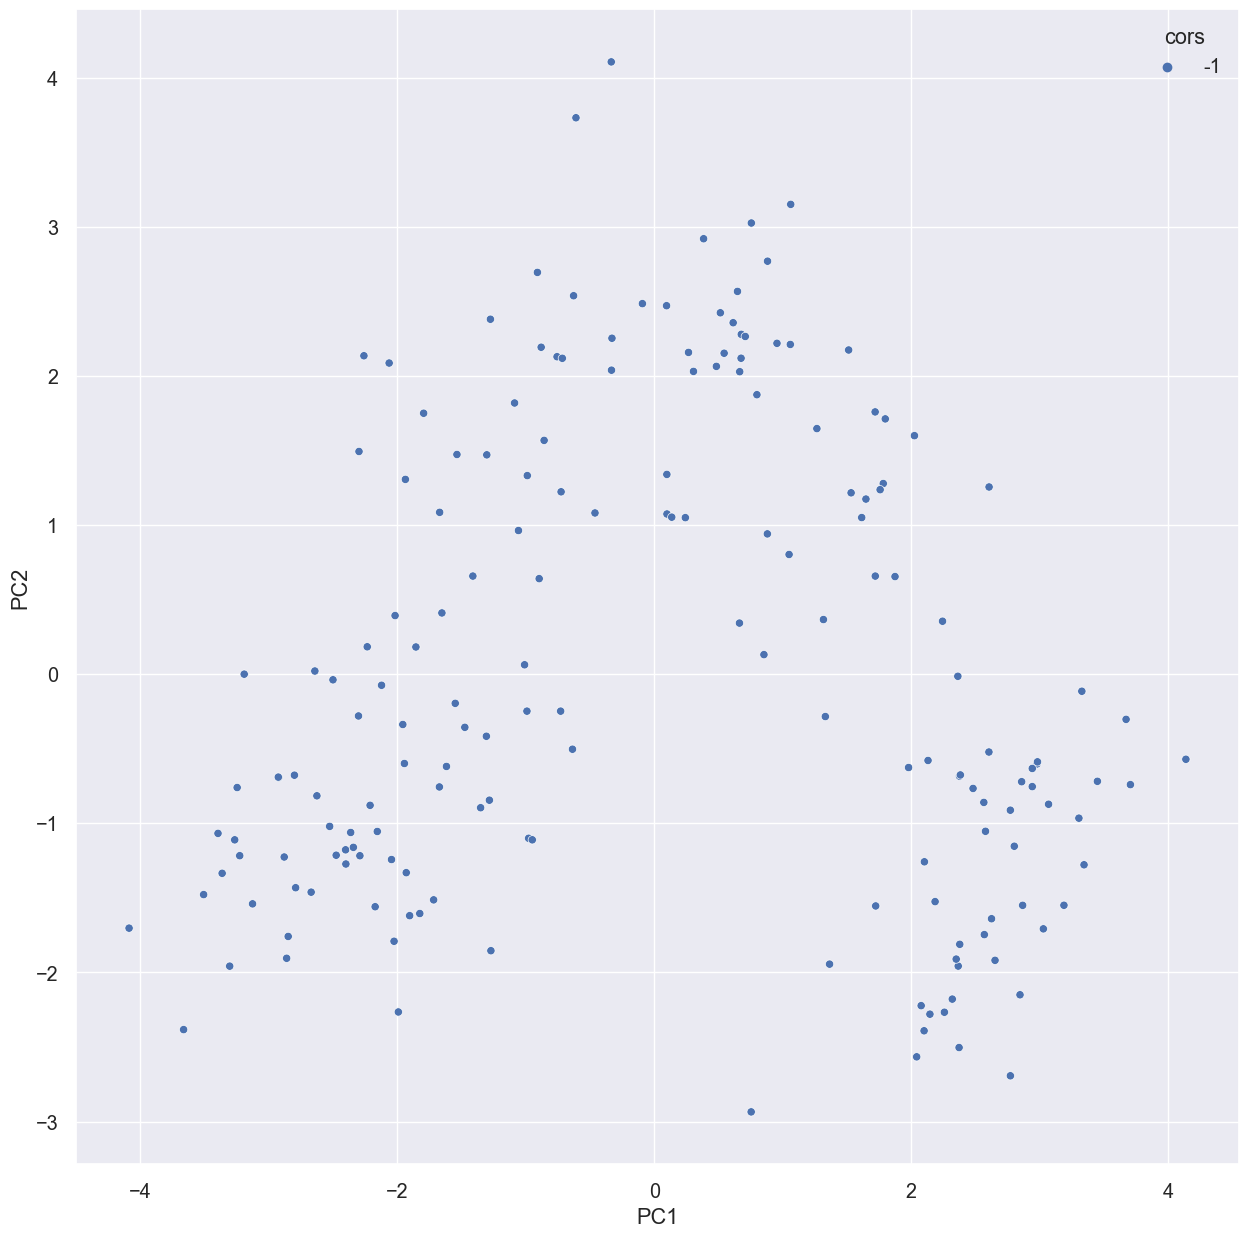

In [147]:
# Clusterizando com DBScan
df_db_scan = DBSCAN(eps=.55,min_samples=356).fit(wine_df)

pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(wine_df), columns=['PC1','PC2']) 
pca_data['cors'] = pd.Categorical(dbscan.labels_)
sns.scatterplot(x="PC1", y="PC2", hue="cors", data=pca_data)

#### 2. Compare os dois resultados, aponte as semelhanças e diferenças e interprete

No k-Means com a escolha de 3 clusters com o índice de silhueta, podemos observar que tivemos os clusters vermelho e verde acima da média global e bem distribuído, já o cluster azul possui ruídos e quase abaixo da média global. O k-means agrupado com 2 cluster notamos uma melhora na distribuição e a ausência de ruídos. No DBScan que é um modelo baseado em densidade observamos um cluster com uma grande quantidade de ruídos. 

observa-se que nele existe cluster negativo, isso acontece devido a presença de outliers no dataste, desta forma, é necessário a retirada desses outliers para melhorar ainda mais a clusterização através do método K-Means.

Por fim, observa-se que no modelo k-Means existe cluster negativo com a escolhe de 3 clusters, isso acontece devido a presença de outliers no dataste, desta forma, é necessário a retirada desses outliers para melhorar ainda mais a clusterização através do método K-Means.

#### 3. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos. 

#### K-means

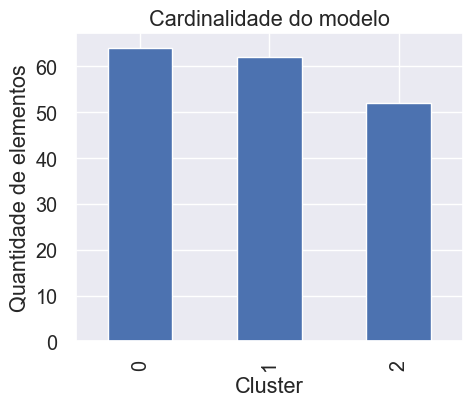

In [158]:
wine_df['cluster'] = km_3.labels_
wine_df.head(178)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
wine_df['cluster'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Cardinalidade do modelo')
ax.set_xlabel('Cluster')
ax.set_ylabel('Quantidade de elementos');

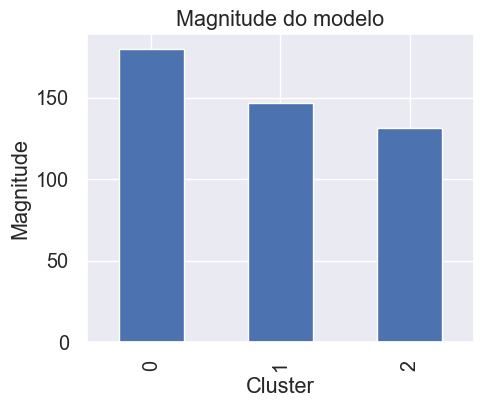

In [164]:
mag_df = pd.DataFrame(
    zip(
        np.min(km_3.transform(normalized_df), axis=1),
        km_3.labels_
    ), columns=['distance_to_center', 'cluster']
)
mag_df.head(178)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
mag_df.groupby('cluster').sum()['distance_to_center'].plot(kind='bar', ax=ax)
ax.set_title('Magnitude do modelo')
ax.set_xlabel('Cluster')
ax.set_ylabel('Magnitude');

O k-means tem uma melhor classificação pois possui uma melhor distribuição e tem a mesma proporção comparando magnitude com a cardinalidade.

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

mag_df = pandas.DataFrame(zip(numpy.min(model.transform(wine_df), axis=1),labels), 
                          columns=['distance_to_center', 'cluster']
    )

mag_df.groupby('cluster').sum()['distance_to_center'].plot(kind='bar', ax=ax[1])
    ax[1].set_title('Magnitude do modelo')
    ax[1].set_xlabel('Cluster')
    ax[1].set_ylabel('Magnitude')

    pca_data['cluster'].value_counts().plot(kind='bar', ax=ax[2])
    ax[2].set_title('Cardinalidade do modelo')
    ax[2].set_xlabel('Cluster')
    ax[2].set_ylabel('Quantidade de elementos')

IndentationError: unexpected indent (705901167.py, line 8)

#### 4. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

Não, a silhueta não é o índice mais adequado para escolher o número de clusters para o algoritmo DBScan. O DBScan é um algoritmo de agrupamento baseado em densidade, o que significa que ele encontra clusters de alta densidade em um conjunto de dados. Ele não requer que você especifique o número de clusters antes de começar o processo de agrupamento, pois ele pode encontrar clusters de qualquer tamanho e forma. O índice de silhueta é um índice que pode ser usado para avaliar a qualidade de um agrupamento em um conjunto de dados, mas ele não é um parâmetro do algoritmo DBScan.

## Medidas de Similaridade

#### 1. Determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

<b>1º Passo:</b>  Colete as séries temporais para o problema em questão. Certifique-se de ter suficientes observações para cada   série temporal para que os cálculos de correlação sejam precisos.

<b>2º Passo:</b> Calcule a correlação cruzada entre todas as combinações de séries temporais. A correlação cruzada mede a similaridade entre duas séries temporais ao longo do tempo.

<b>3º Passo:</b> Ordene as séries temporais de acordo com o valor máximo de correlação cruzada entre elas. As séries temporais com os valores mais altos de correlação cruzada são mais similares entre si do que aquelas com valores mais baixos.

<b>4º Passo:</b> Agrupe as séries temporais em 3 grupos. Você pode usar um método de agrupamento hierárquico ou um método de agrupamento baseado em centroides para fazer isso. O método de agrupamento hierárquico cria um diagrama de árvore que mostra como as séries temporais são relacionadas entre si, enquanto o método de agrupamento baseado em centroides cria grupos com base em características comuns entre as séries temporais.

<b>5º Passo:</b> Avalie o resultado do agrupamento. Verifique se as séries temporais em cada grupo são realmente similares entre si e se o agrupamento reflete o critério de similaridade que você está tentando medir. Se necessário, ajuste o método de agrupamento ou o critério de similaridade para obter um resultado mais satisfatório.

#### 2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

Para agrupar as séries temporais em 3 grupos de acordo com um critério de similaridade baseado no valor máximo de correlação cruzada entre elas, eu recomendaria usar o método de agrupamento hierárquico.

O método de agrupamento hierárquico é um algoritmo de clusterização que cria um diagrama de árvore, chamado de dendrograma, que mostra como as séries temporais são relacionadas entre si. Ele começa agrupando as séries temporais mais similares entre si e, a partir daí, vai combinando os grupos formados até que todas as séries temporais estejam agrupadas em um único grupo.

O método de agrupamento hierárquico é uma opção boa para o problema em questão, pois permite visualizar de forma clara como as séries temporais estão relacionadas entre si e como elas foram agrupadas. Além disso, o dendrograma gerado pelo método de agrupamento hierárquico pode ser facilmente cortado em qualquer ponto para formar grupos de tamanho desejado, o que é útil para criar os 3 grupos desejados.

#### 3. Indique um caso de uso para essa solução projetada.

Uma possível aplicação para a solução projetada seria na análise de séries temporais de vendas de produtos em uma empresa. Suponha que a empresa tenha 10 produtos diferentes e queira saber quais produtos têm comportamentos de vendas semelhantes entre si. A solução projetada poderia ser usada para agrupar esses produtos em 3 grupos de acordo com o critério de similaridade baseado no valor máximo de correlação cruzada entre as séries temporais de vendas de cada produto. Isso permitiria à empresa identificar padrões comuns entre os produtos e tomar decisões de gerenciamento de produtos mais informadas.

#### 4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

Uma estratégia alternativa para medir a similaridade entre séries temporais seria usar a distância de Euclides. Aqui estão os passos gerais que você pode seguir para medir a similaridade entre séries temporais usando a distância de Euclides:

<b>1º Passo:</b> Colete as séries temporais para o problema em questão. Certifique-se de ter suficientes observações para cada série temporal para que os cálculos de distância sejam precisos.

<b>2º Passo:</b> Calcule a distância de Euclides entre todas as combinações de séries temporais. A distância de Euclides é uma medida de similaridade entre duas séries temporais que leva em conta a distância entre os pontos em um espaço multidimensional.

<b>3º Passo:</b> Ordene as séries temporais de acordo com a distância de Euclides entre elas. As séries temporais com as menores distâncias de Euclides são mais similares entre si do que aquelas com distâncias maiores.

<b>4º Passo:</b> Escolha um limiar de similaridade. O limiar de similaridade é o valor mínimo de distância de Euclides que as séries temporais devem ter para serem consideradas similares entre si. Você pode escolher um limiar de similaridade de acordo com suas necessidades e objetivos específicos.

<b>5º Passo:</b> Agrupe as séries temporais que atendem ao limiar de similaridade. As séries temporais que têm distâncias de Euclides abaixo do limiar de similaridade são agrupadas juntas, enquanto as séries temporais com distâncias de Euclides acima do limiar são deixadas em grupos separados.

<b>6º Passo:</b> Avalie o resultado do agrupamento. Verifique se as séries temporais em cada grupo são realmente similares entre si e se o agrupamento reflete o critério de similaridade que você está tentando medir. Se necessário, ajuste o limiar de similaridade ou o método de agrupamento para obter um resultado mais satisfatório.